# Time Series Analysis of Shortwave Upward Flux

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
#from netCDF4 import Dataset
#from mpl_toolkits.basemap import Basemap

NetCDF files from 2015-01 to 2015-07

In [24]:
simulated_Earth_Folder = "C:/Users/cenwe/Downloads/Programming/Python/simulated_Earth/"
data1 = xr.open_dataset(simulated_Earth_Folder + "jan.nc")
data2 = xr.open_dataset(simulated_Earth_Folder + "feb.nc")
data3 = xr.open_dataset(simulated_Earth_Folder + "mar.nc")
data4 = xr.open_dataset(simulated_Earth_Folder + "apr.nc")
data5 = xr.open_dataset(simulated_Earth_Folder + "may.nc")
data6 = xr.open_dataset(simulated_Earth_Folder + "jun.nc")
data7 = xr.open_dataset(simulated_Earth_Folder + "jul.nc")

## Radiative Flux Graph

The focus is on shortwave upward flux and shortwave clear-sky upward flux

In [25]:
FUS1 = data1.FUS
FUS2 = data2.FUS
FUS3 = data3.FUS
FUS4 = data4.FUS
FUS5 = data5.FUS
FUS6 = data6.FUS
FUS7 = data7.FUS

### FUS

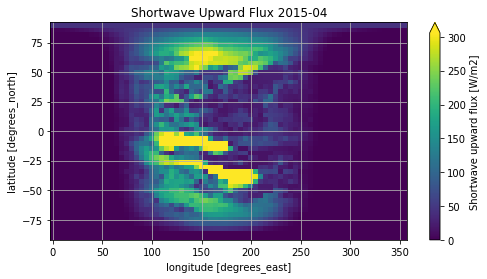

In [26]:
FUSGraph = FUS4.isel(time = 0, ilev = 0)
plt.figure(figsize=(8,4))
FUSGraph.plot(robust = True)
plt.title('Shortwave Upward Flux 2015-04')
plt.grid(True)

## Daily Average Radiative Flux

([<matplotlib.axis.XTick at 0x1bde9426548>,
 <a list of 5 Text xticklabel objects>)

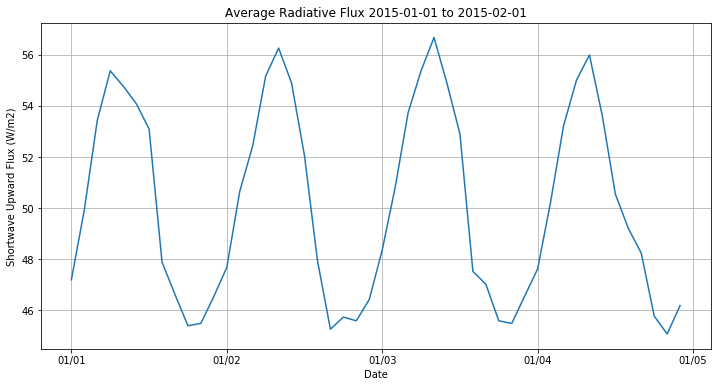

In [28]:
dayArray = []
hours = 48

for t in range(hours):
    dayArray.append(FUS1.isel(time = t, ilev = 0).mean())

plt.figure(figsize=(12,6))
plt.plot(dayArray)
plt.title('Average Radiative Flux 2015-01-01 to 2015-02-01')
plt.ylabel('Shortwave Upward Flux (W/m2)')
plt.xlabel('Date')
plt.grid(True)
plt.xticks(np.arange(0, 60, 12), ['01/01', '01/02', '01/03', '01/04', '01/05'])

## Monthly Average Radiative Flux

The average calculated includes radiative flux from regions not photographed by DSCOVR
<br>
An average of 1784 out of 3312 coordinates at any time-period have radiative flux data

([<matplotlib.axis.XTick at 0x1bde88e5ec8>,
 <a list of 7 Text xticklabel objects>)

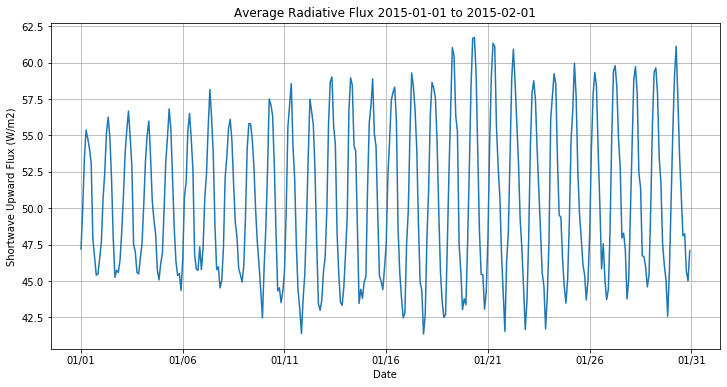

In [13]:
janArray = []
hours = 360

for t in range(hours):
    janArray.append(FUS1.isel(time = t, ilev = 0).mean())

plt.figure(figsize=(12,6))
plt.plot(janArray)
plt.title('Average Radiative Flux 2015-01-01 to 2015-02-01')
plt.ylabel('Shortwave Upward Flux (W/m2)')
plt.xlabel('Date')
plt.grid(True)
plt.xticks(np.arange(0, 384, 60), ['01/01', '01/06', '01/11', '01/16', '01/21', '01/26', '01/31'])

## 2015 Average Radiative Flux

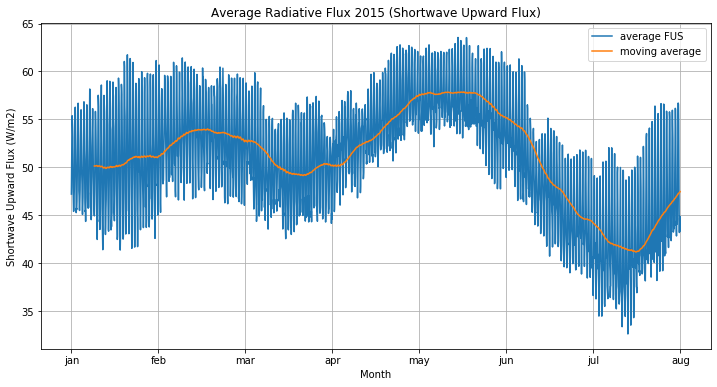

In [19]:
annualArrayFUS = []

#A lot of repetitive code for every month of the year
for t in range(384):
    annualArrayFUS.append(FUS1.isel(time = t, ilev = 0).mean())
for t in range(336):
    annualArrayFUS.append(FUS2.isel(time = t, ilev = 0).mean())
for t in range(360):
    annualArrayFUS.append(FUS3.isel(time = t, ilev = 0).mean())
for t in range(360):
    annualArrayFUS.append(FUS4.isel(time = t, ilev = 0).mean())
for t in range(384):
    annualArrayFUS.append(FUS5.isel(time = t, ilev = 0).mean())
for t in range(360):
    annualArrayFUS.append(FUS6.isel(time = t, ilev = 0).mean())
for t in range(336):
    annualArrayFUS.append(FUS7.isel(time = t, ilev = 0).mean())

plt.figure(figsize=(12,6))
plt.plot(annualArrayFUS, label = 'average FUS')
plt.title('Average Radiative Flux 2015 (Shortwave Upward Flux)')
plt.ylabel('Shortwave Upward Flux (W/m2)')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(np.arange(0, 2880, 360), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug'])
#Get moving average
FUSdf = pd.DataFrame(annualArrayFUS)
movingMean = FUSdf.rolling(96).mean()
plt.plot(movingMean, label = 'moving average')
plt.legend()

## Fourier Power Spectrum Analysis

In [16]:
import random

#### Scenario 1: Unevenly spaced time series

In [41]:
fftInput = np.array(annualArrayFUS)

for i in range(len(fftInput)):
    if random.random() < 0.90:
        fftInput[i] = fftInput[i-1]

#### Scenario 2: Few time series samples

In [36]:
fftInput = np.array(annualArrayFUS)

dailydp = 3
counter = 0
for i in range(len(fftInput)):
    if counter < 12 / dailydp:
        fftInput[i] = fftInput[i-1]
        counter = counter + 1
    else:
        counter = 0

#### Scenario 3: Random fluctuations

In [612]:
fftInput = np.array(annualArrayFUS)

fluctuation_chance = 0.6
fluctuation_magnitude = 0
randomNum = random.random()
for i in range(len(fftInput)):
    if randomNum < fluctuation_chance/2:
        fftInput[i] = fftInput[i] + random.random()*fluctuation_magnitude
    elif randomNum > 1 - fluctuation_chance/2:
        fftInput[i] = fftInput[i] - random.random()*fluctuation_magnitude

#### Scenario 4: Scenarios 1, 2, 3

In [34]:
fftInput = np.array(annualArrayFUS)

#1
for i in range(len(fftInput)):
    if random.random() < 0.5:
        fftInput[i] = fftInput[i-1]
#2
dailydp = 4
counter = 0
for i in range(len(fftInput)):
    if counter < 12 / dailydp:
        fftInput[i] = fftInput[i-1]
        counter = counter + 1
    else:
        counter = 0
#3
fluctuation_chance = 0.6
fluctuation_magnitude = 0
randomNum = random.random()
for i in range(len(fftInput)):
    if randomNum < fluctuation_chance/2:
        fftInput[i] = fftInput[i] + random.random()*fluctuation_magnitude
    elif randomNum > 1 - fluctuation_chance/2:
        fftInput[i] = fftInput[i] - random.random()*fluctuation_magnitude

#### Resulting graph

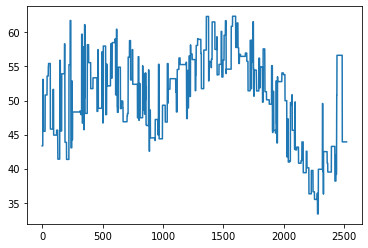

In [42]:
plt.plot(fftInput)

#### Fourier transform graph

In [20]:
fftInput = np.array(annualArrayFUS)

22

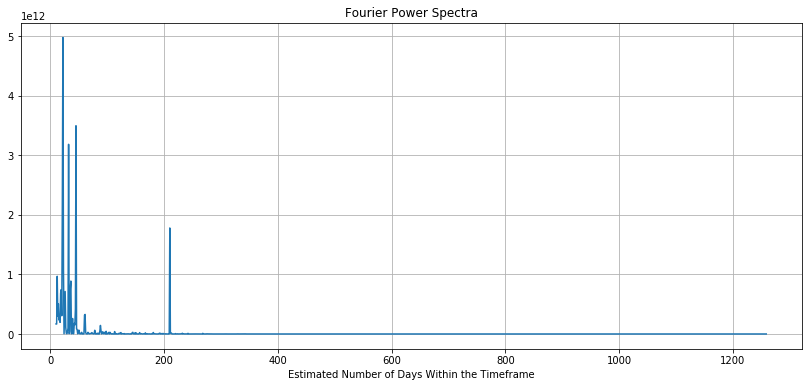

In [43]:
fourierTransform = np.fft.fft(fftInput)
fourierTransform = fourierTransform[0:int(len(fftInput)/2)]
powerSpectrum = fourierTransform**4

frequency = np.arange(0, len(fftInput)/2)

exclude = 10
plt.figure(figsize=(14,6))
plt.plot(frequency[exclude:], abs(powerSpectrum)[exclude:])

plt.grid(True)
plt.title('Fourier Power Spectra')
plt.xlabel('Estimated Number of Days Within the Timeframe')
plt.yscale('linear')

psList = abs(powerSpectrum).tolist()
estimated_days = psList.index(max(psList[exclude:]))
estimated_days

#### Derived rotation period

In [22]:
dpInterval = 2

time_span = len(annualArrayFUS)*dpInterval
rotational_period = time_span/estimated_days
rotational_period

24.0

## Time Series Forcasting

In [662]:
from sklearn.metrics import mean_squared_error
from statistics import stdev 

#### Naive Forecast

In [32]:
#Creates a new column that shifts the FUSdf DataFrame 1 time-period forward
shiftedFUSdf = pd.concat([FUSdf, FUSdf.shift(1)], axis = 1)
shiftedFUSdf.columns = ['original', 'shifted']
shiftedFUSdf = shiftedFUSdf[1:]

In [664]:
fluxError = mean_squared_error(shiftedFUSdf.original, shiftedFUSdf.shifted)
np.sqrt(fluxError)

2.5713367

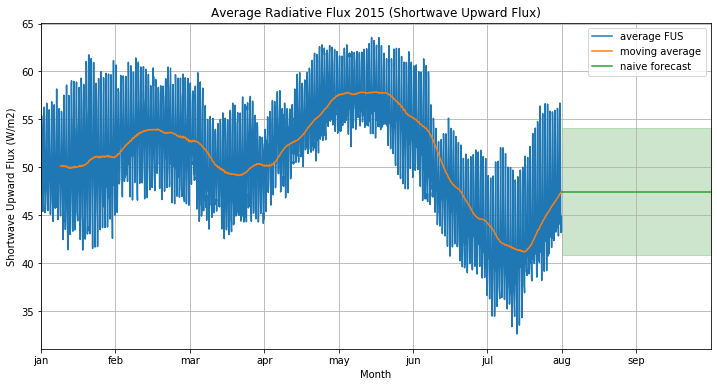

In [665]:
plt.figure(figsize=(12,6))
plt.plot(annualArrayFUS, label = 'average FUS')
#Get moving average
FUSdf = pd.DataFrame(annualArrayFUS)
movingMean = FUSdf.rolling(96).mean()
plt.plot(movingMean, label = 'moving average')
#Naive forecast
x = np.linspace(2520,3240,2)
y = movingMean.iloc[2519, 0] + x * 0
plt.plot(x, y, label = 'naive forecast')
plt.fill_between(x,
                 y + fluxError,
                 y - fluxError,
                 color = 'green',
                 alpha = 0.2)
#Labels
plt.xlim(0, 3240)
plt.title('Average Radiative Flux 2015 (Shortwave Upward Flux)')
plt.ylabel('Shortwave Upward Flux (W/m2)')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(np.arange(0, 3240, 360), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep'])
plt.legend()

#### Autoregressive Integrated Moving Average (ARIMA)

In [666]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plot_acf identifies parameter q
#plot_pacf identifies parameter p
#ARIMA(p, d, q)

Autoregressive (p) - The previous value best reflects the current value
<br>
Integrated (d) - Removes the trend component for a stationary graph
<br>
> No trend when d = 0
<br>

Moving Average (q)

In [667]:
FUSar = ARIMA(FUSdf[:2500], order = (4, 0, 3))
FUSarFit = FUSar.fit()
FUSarFit.aic #Less is better

8749.260847084115

In [668]:
FUSForecast = FUSarFit.forecast(steps = 2000)
forecastdf = pd.DataFrame(FUSForecast)
forecastRange = forecastdf.iloc[2, :]
forecastRange = pd.DataFrame(forecastRange.tolist(), index = forecastRange.index)
forecastRange.columns = ['min', 'max']

optimalForecast = FUSarFit.forecast(steps = 2000)[0]
optimalForecast = pd.DataFrame(optimalForecast)

In [669]:
#Not very effective compared to Naive Forecast method (2.5713367)
np.sqrt(mean_squared_error(FUSdf[520:2520], optimalForecast))

6.491884925095034

C:\Users\cenwe\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


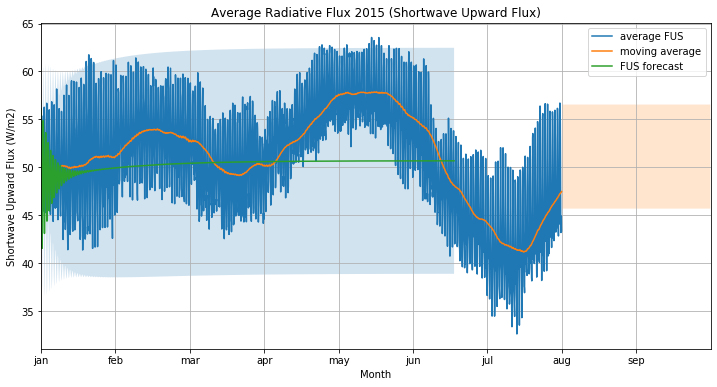

In [693]:
plt.figure(figsize=(12,6))
plt.plot(annualArrayFUS, label = 'average FUS')
#Get moving average
FUSdf = pd.DataFrame(annualArrayFUS)
movingMean = FUSdf.rolling(96).mean()
plt.plot(movingMean, label = 'moving average')
#Get forecast
plt.plot(optimalForecast, label='FUS forecast')
plt.fill_between(forecastRange.index,
                 forecastRange.iloc[:, 0],
                 forecastRange.iloc[:, 1], 
                 alpha=.2)

#Moving average forecast (at this point still non-stationary)
mmar = ARIMA(movingMean[96:2520], order = (0, 0, 2))
mmFit = mmar.fit()
mmForecast = mmFit.forecast(steps = 720)
mmdf = pd.DataFrame(mmForecast)
mmRange = mmdf.iloc[2, :]
mmRange = pd.DataFrame(mmRange.tolist(), index = mmRange.index)

mmOptimalForecast = mmFit.forecast(steps = 720)[0]
mmOptimalForecast = pd.DataFrame(mmOptimalForecast)
#moving average forecast plot
x = np.linspace(2520,3240,2)
plt.fill_between(mmRange.index + 2520,
                 mmRange.iloc[:, 0],
                 mmRange.iloc[:, 1], 
                 alpha=.2)

#Graph labels
plt.title('Average Radiative Flux 2015 (Shortwave Upward Flux)')
plt.ylabel('Shortwave Upward Flux (W/m2)')
plt.xlabel('Month')
plt.grid(True)
plt.xlim(0, 3240)
plt.xticks(np.arange(0, 3240, 360), ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep'])
plt.legend()

Method to find optimal ARIMA

In [32]:
for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                mmar = ARIMA(movingMean[2340:2520], order = (p, d, q))
                mmarFit = mmar.fit()
                print(p)
                print(d)
                print(q)
                print(mmarFit.aic)
            except:
                print('-')

0
0
0
755.1594371404653
0
0
1
515.7098742568635
0
0
2
286.46142768428257
-
-
-
1
0
0
-639.5799934705476
-
-
-
-
-
2
0
0
-907.4997602420474
-
-
-
-
-


C:\Users\cenwe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\cenwe\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
